In [233]:
# Section must be included at the beginning of each new notebook. Remember to change the app name.
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('linear_regression_adv').getOrCreate()

# If you're getting an error with numpy, please type 'sudo pip3 install numpy --user' into the console.
# If you're getting an error with another package, type 'sudo pip3 install PACKAGENAME --user'. 
# Replace PACKAGENAME with the relevant package (such as pandas, etc).
from pyspark.ml.regression import LinearRegression

# First, let's import the data. Note that we can infer the schema as it's a CSV file.
df_country = spark.read.csv("Datasets/IVS_Country.csv",inferSchema=True,header=True)
df_agegroup = spark.read.csv("Datasets/IVS_AgeGroup.csv",inferSchema=True,header=True)
df_accomodation = spark.read.csv("Datasets/IVS_Accomodation.csv",inferSchema=True,header=True)

In [234]:
# Let's explore. Here's the first row of the data.
print(df_country.head())

# And the entire data structure. 
df_country.printSchema()

Row(Pkey=1, Year=1997, Quarter=4, Year ending='YEDec 1997', Airport of departure='Auckland', Purpose of visit='Business', Country of permanent residence='Africa and Middle East', Total visitor spend=4266524.07, Total visitors=1684)
root
 |-- Pkey: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Year ending: string (nullable = true)
 |-- Airport of departure: string (nullable = true)
 |-- Purpose of visit: string (nullable = true)
 |-- Country of permanent residence: string (nullable = true)
 |-- Total visitor spend: double (nullable = true)
 |-- Total visitors: integer (nullable = true)



In [235]:
# Let's explore. Here's the first row of the data.
print(df_agegroup.head())

# And the entire data structure. 
df_agegroup.printSchema()

Row(Pkey=1, Year=1997, Quarter=4, Year ending='YEDec 1997', Airport of departure='Auckland', Purpose of visit='Business', Age band='20 - 24', Total visitor spend=6588341.03, Total visitors=2394)
root
 |-- Pkey: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Year ending: string (nullable = true)
 |-- Airport of departure: string (nullable = true)
 |-- Purpose of visit: string (nullable = true)
 |-- Age band: string (nullable = true)
 |-- Total visitor spend: double (nullable = true)
 |-- Total visitors: integer (nullable = true)



In [236]:
# Let's explore. Here's the first row of the data.
print(df_accomodation.head())

# And the entire data structure. 
df_accomodation.printSchema()

Row(Pkey=1, Year=1997, Quarter=4, Year ending='YEDec 1997', Main accommodation used='  A house you own', Total visitors=None)
root
 |-- Pkey: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Year ending: string (nullable = true)
 |-- Main accommodation used: string (nullable = true)
 |-- Total visitors: integer (nullable = true)



In [237]:
dfg_country = df_country.groupby('Year').count()

print("Total data points:", dfg_country.count())

dfg_country.orderBy('count', ascending=True).show()


Total data points: 22
+----+-----+
|Year|count|
+----+-----+
|2018|  208|
|1997|  208|
|2003|  832|
|2007|  832|
|2013|  832|
|2015|  832|
|2006|  832|
|2009|  832|
|2001|  832|
|2014|  832|
|2004|  832|
|1998|  832|
|2012|  832|
|2016|  832|
|2005|  832|
|2000|  832|
|2010|  832|
|2011|  832|
|2008|  832|
|2017|  832|
+----+-----+
only showing top 20 rows



In [238]:
dfg_agegroup = df_agegroup.groupby('Year').count()

print("Total data points:", dfg_agegroup.count())

dfg_agegroup.orderBy('count', ascending=True).show()


Total data points: 22
+----+-----+
|Year|count|
+----+-----+
|2018|  224|
|1997|  224|
|2003|  896|
|2007|  896|
|2013|  896|
|2015|  896|
|2006|  896|
|2009|  896|
|2001|  896|
|2014|  896|
|2004|  896|
|1998|  896|
|2012|  896|
|2016|  896|
|2005|  896|
|2000|  896|
|2010|  896|
|2011|  896|
|2008|  896|
|2017|  896|
+----+-----+
only showing top 20 rows



In [239]:
dfg_accomodation = df_accomodation.groupby('Year').count()

print("Total data points:", dfg_accomodation.count())

dfg_accomodation.orderBy('count', ascending=True).show()

Total data points: 22
+----+-----+
|Year|count|
+----+-----+
|2018|   22|
|1997|   22|
|2003|   88|
|2007|   88|
|2013|   88|
|2015|   88|
|2006|   88|
|2009|   88|
|2001|   88|
|2014|   88|
|2004|   88|
|1998|   88|
|2012|   88|
|2016|   88|
|2005|   88|
|2000|   88|
|2010|   88|
|2011|   88|
|2008|   88|
|2017|   88|
+----+-----+
only showing top 20 rows



In [240]:
df_country.filter(df_country['Total visitors'].isNull()).count()

5764

In [241]:
df_country.filter(df_country['Total visitor spend'].isNull()).count()

5764

In [242]:
# Now that we understand the data's features, let's use a Python package to neatly describe the data.
import pandas as pd
df_country.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Pkey,17056,8528.5,4923.787431100846,1,17056
Year,17056,2007.5,5.9270657557172814,1997,2018
Quarter,17056,2.5,1.1289220372929016,1,4
Year ending,17056,None,None,YEDec 1997,YESep 2017
Airport of departure,17056,None,None,Auckland,Wellington
Purpose of visit,17056,None,None,Business,Visiting friends / relatives
Country of permanent residence,17056,None,None,Africa and Middle East,USA
Total visitor spend,11292,5.09246119696264E7,1.0193863986366412E8,2.4,1.235333092E9
Total visitors,11292,15576.741232731138,33229.303734004156,1,314584


In [243]:
# Now that we understand the data's features, let's use a Python package to neatly describe the data.
import pandas as pd
df_agegroup.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Pkey,18368,9184.5,5302.529207840349,1,18368
Year,18368,2007.5,5.927053344093044,1997,2018
Quarter,18368,2.5,1.1289196732637206,1,4
Year ending,18368,None,None,YEDec 1997,YESep 2017
Airport of departure,18368,None,None,Auckland,Wellington
Purpose of visit,18368,None,None,Business,Visiting friends / relatives
Age band,18368,None,None,20 - 24,Under 20
Total visitor spend,12329,4.664130248687477E7,7.703335405405422E7,313.96,6.334628885E8
Total visitors,12329,14266.559493876226,21268.587894159005,1,189574


In [244]:
# Now that we understand the data's features, let's use a Python package to neatly describe the data.
import pandas as pd
df_accomodation.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Pkey,1804,902.5,520.9142603794473,1,1804
Year,1804,2007.5,5.928535391755241,1997,2018
Quarter,1804,2.5,1.1292019573374812,1,4
Year ending,1804,None,None,YEDec 1997,YESep 2017
Main accommodation used,1804,None,None,A house you own,"Youth Hostel, YMCA, YWCA"
Total visitors,1392,126359.6422413793,213557.10459242677,85,910028


In [245]:
df_agegroup.filter(df_agegroup['Total visitors'].isNull()).count()

6039

In [246]:
df_agegroup.filter(df_agegroup['Total visitor spend'].isNull()).count()

6039

In [247]:
df_accomodation.filter(df_accomodation['Total visitors'].isNull()).count()

412

+----+-----+--------------+
|Year|count|Total visitors|
+----+-----+--------------+
|1997|  116|       1344175|
|1998|  472|       5260311|
|1999|  478|       5528644|
|2000|  499|       6028412|
|2001|  495|       6554112|
|2002|  495|       6735719|
|2003|  530|       7226039|
|2004|  554|       8048578|
|2005|  553|       8522378|
|2006|  565|       8497075|
|2007|  568|       8749918|
|2008|  576|       8760336|
|2009|  560|       8535507|
|2010|  556|       8859303|
|2011|  554|       9045358|
|2012|  547|       9296768|
|2013|  587|       9460251|
|2014|  605|      10069492|
|2015|  603|      10905705|
|2016|  623|      12096148|
+----+-----+--------------+
only showing top 20 rows

Total data points: 11292
Total data points: 11292


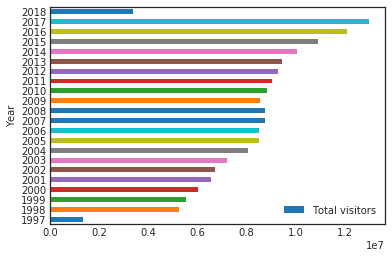

In [270]:
# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_country = df_country.groupby('Year').agg(
    F.count('Year').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'))

dfg_country = dfg_country.orderBy('Year', ascending=True)

dfg_country.show()

# Total Number of records before removing null value
print("Total data points:", df_country.count())

# Total Number of records after removing null value
df_country = df_country.na.drop()
# df_country.show()
print("Total data points:", df_country.count())

some_df=dfg_country.toDF('Year', 'count', 'Total visitors')
pandaDf = some_df.toPandas()

df =  pandaDf 
ax = df.plot.barh(x='Year', y='Total visitors', rot=0)


+------------------------------+-----+--------------+
|Country of permanent residence|count|Total visitors|
+------------------------------+-----+--------------+
|          Africa and Middle...|  900|       4057088|
|                     Australia| 1060|      69870263|
|                        Canada|  867|       3384958|
|                         China|  763|      10820144|
|                       Germany|  869|       4788327|
|                         Japan|  846|       8666289|
|            Korea, Republic of|  609|       5162785|
|              Rest of Americas|  600|       2445624|
|                  Rest of Asia|  997|      14047098|
|                Rest of Europe| 1004|      11252635|
|               Rest of Oceania|  757|       8582475|
|                            UK| 1002|      17485229|
|                           USA| 1018|      15329647|
+------------------------------+-----+--------------+

Total data points: 11292
Total data points: 11292


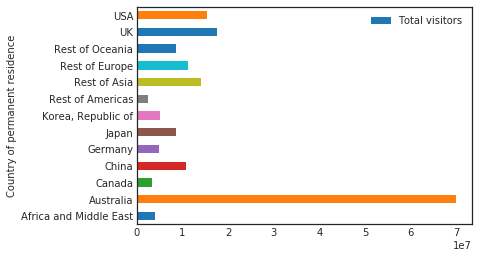

In [271]:
# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_country = df_country.groupby('Country of permanent residence').agg(
    F.count('Country of permanent residence').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'))

dfg_country = dfg_country.orderBy('Country of permanent residence', ascending=True)

dfg_country.show()

# Total Number of records before removing null value
print("Total data points:", df_country.count())

# Total Number of records after removing null value
df_country = df_country.na.drop()
# df_country.show()
print("Total data points:", df_country.count())

some_df=dfg_country.toDF('Country of permanent residence', 'count', 'Total visitors')
pandaDf = some_df.toPandas()

df =  pandaDf 
ax = df.plot.barh(x='Country of permanent residence', y='Total visitors', rot=0)


+--------------------+-----+--------------+
|    Purpose of visit|count|Total visitors|
+--------------------+-----+--------------+
|            Business| 2680|      20698010|
|  Holiday / vacation| 3146|      92895616|
|               Other| 2596|      13362432|
|Visiting friends ...| 2870|      48936504|
+--------------------+-----+--------------+

Total data points: 11292
Total data points: 11292


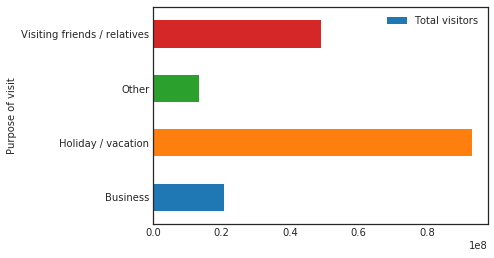

In [272]:
# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_country = df_country.groupby('Purpose of visit').agg(
    F.count('Purpose of visit').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'))

dfg_country = dfg_country.orderBy('Purpose of visit', ascending=True)

dfg_country.show()

# Total Number of records before removing null value
print("Total data points:", df_country.count())

# Total Number of records after removing null value
df_country = df_country.na.drop()
# df_country.show()
print("Total data points:", df_country.count())

some_df=dfg_country.toDF('Purpose of visit', 'count', 'Total visitors')
pandaDf = some_df.toPandas()

df =  pandaDf 
ax = df.plot.barh(x='Purpose of visit', y='Total visitors', rot=0)

+--------------------+-----+--------------+
|Airport of departure|count|Total visitors|
+--------------------+-----+--------------+
|            Auckland| 4262|     127947041|
|        Christchurch| 3604|      33641657|
|          Queenstown|  390|       3277265|
|          Wellington| 3036|      11026599|
+--------------------+-----+--------------+

Total data points: 11292
Total data points: 11292


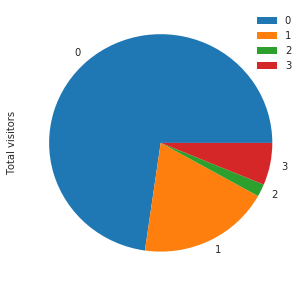

In [275]:
# Spark: Groupby + Agg + alias
import pyspark.sql.functions as F
dfg_country = df_country.groupby('Airport of departure').agg(
    F.count('Airport of departure').alias('count'), 
    F.sum('Total visitors').alias('Total visitors'))

dfg_country = dfg_country.orderBy('Airport of departure', ascending=True)

dfg_country.show()

# Total Number of records before removing null value
print("Total data points:", df_country.count())

# Total Number of records after removing null value
df_country = df_country.na.drop()
# df_country.show()
print("Total data points:", df_country.count())

some_df=dfg_country.toDF('Airport of departure', 'count', 'Total visitors')
pandaDf = some_df.toPandas()

df =  pandaDf 
ax = df.plot.pie(y='Total visitors', figsize=(5, 5))

In [74]:
# Total Number of records before removing null value
print("Total data points:", df_country.count())

# Total Number of records after removing null value
df_country = df_country.na.drop()
# df_country.show()
print("Total data points:", df_country.count())

Total data points: 17056
Total data points: 11292


In [102]:
# Total Number of records before removing null value
print("Total data points:", df_agegroup.count())

# Total Number of records after removing null value
df_agegroup = df_agegroup.na.drop()
# df_agegroup.show()
print("Total data points:", df_agegroup.count())

Total data points: 18368
Total data points: 12329


In [227]:
# Total Number of records before removing null value
print("Total data points:", df_accomodation.count())

# Total Number of records after removing null value
df_accomodation = df_accomodation.na.drop()
# df_accomodation.show()
print("Total data points:", df_accomodation.count())

Total data points: 1804
Total data points: 1392


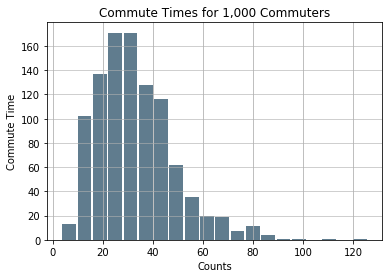

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

In [5]:
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
vector_assembler = VectorAssembler(inputCols = ['Pkey', 'Year', 'Quarter', 'Total visitor spend'], outputCol = 'features')

# Now that we've created the assembler variable, let's actually transform the data.
vector_output = vector_assembler.transform(df)

# Using print schema, you see that the features output column has been added. 
vector_output.printSchema()

# You can see that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)

root
 |-- Pkey: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Year ending: string (nullable = true)
 |-- Airport of departure: string (nullable = true)
 |-- Purpose of visit: string (nullable = true)
 |-- Country of permanent residence: string (nullable = true)
 |-- Total visitor spend: double (nullable = true)
 |-- Total visitors: integer (nullable = true)
 |-- features: vector (nullable = true)



[Row(Pkey=1, Year=1997, Quarter=4, Year ending='YEDec 1997', Airport of departure='Auckland', Purpose of visit='Business', Country of permanent residence='Africa and Middle East', Total visitor spend=4266524.07, Total visitors=1684, features=DenseVector([1.0, 1997.0, 4.0, 4266524.07]))]

In [6]:
# Because the features have been combined into one vector, we no longer need them. Below we select the features and label.
vector_output = vector_output.select(['features', 'Total visitors'])

# You can see that the dataframe now only contains two columns. 
print(vector_output.head(1))
vector_output.show(3)

[Row(features=DenseVector([1.0, 1997.0, 4.0, 4266524.07]), Total visitors=1684)]
+--------------------+--------------+
|            features|Total visitors|
+--------------------+--------------+
|[1.0,1997.0,4.0,4...|          1684|
|[2.0,1997.0,4.0,1...|         67277|
|[3.0,1997.0,4.0,1...|          3596|
+--------------------+--------------+
only showing top 3 rows



In [7]:
# Let's do a randomised 70/30 split. Remember, you should explain why you chose a particular split. 
train_data,test_data = vector_output.randomSplit([0.7,0.3])

# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+------------------+
|summary|    Total visitors|
+-------+------------------+
|  count|              7896|
|   mean|          15751.75|
| stddev|33935.936203543264|
|    min|                 5|
|    max|            314584|
+-------+------------------+

+-------+------------------+
|summary|    Total visitors|
+-------+------------------+
|  count|              3396|
|   mean|15169.830388692579|
| stddev|31526.261124706507|
|    min|                 1|
|    max|            295905|
+-------+------------------+



In [8]:
# Importing the LR package.
from pyspark.ml.regression import LinearRegression

# Instantiate the instance.
lr = LinearRegression(featuresCol='features', labelCol='Total visitors')

# Fit the training data.
lr_model = lr.fit(train_data)

# Print the coefficients.
print("Linear Regression Coefficients: " + str(lr_model.coefficients))

# Print the intercept.
print("Linear Regression Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary

# Print RMSE. 
print("Linear Regression RMSE on training data: " + str(training_summary.rootMeanSquaredError))

# Print R2.
print("Linear Regression R2 on training data: " + str(training_summary.r2))

Linear Regression Coefficients: [-0.010583181431505165,169.54636313762964,-6.796631880993142,0.0002938365580888209]
Linear Regression Intercept: -339737.7234352198

Linear Regression RMSE on training data: 14518.556521510429
Linear Regression R2 on training data: 0.8169447389429543


Text(0,0.5,'Beta Coefficients')

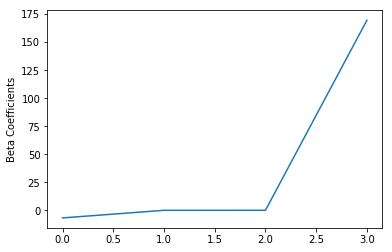

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

In [11]:
train_data.describe().show()

+-------+------------------+
|summary|    Total visitors|
+-------+------------------+
|  count|              7896|
|   mean|          15751.75|
| stddev|33935.936203543264|
|    min|                 5|
|    max|            314584|
+-------+------------------+



In [16]:
# Let's evaluate the model against the test data.
test_results = lr_model.evaluate(test_data)

# And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
print("Linear Regression RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("Linear Regression R2 on test data: " + str(test_results.r2))

Linear Regression RMSE on test data: 13464.577873218419
Linear Regression R2 on test data: 0.8175396720865907


In [34]:
from pyspark.ml.regression import GeneralizedLinearRegression

glr = GeneralizedLinearRegression(featuresCol='features', labelCol='Total visitors')

# Fit the model
glr_model = glr.fit(train_data)

# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(glr_model.coefficients))
print("Intercept: " + str(glr_model.intercept))

# Summarize the model over the training set and print out some metrics
glr_summary = glr_model.summary
print("Coefficient Standard Errors: " + str(glr_summary.coefficientStandardErrors))
print("T Values: " + str(glr_summary.tValues))
print("P Values: " + str(glr_summary.pValues))
print("Dispersion: " + str(glr_summary.dispersion))
print("Null Deviance: " + str(glr_summary.nullDeviance))
print("Residual Degree Of Freedom Null: " + str(glr_summary.residualDegreeOfFreedomNull))
print("Deviance: " + str(glr_summary.deviance))
print("Residual Degree Of Freedom: " + str(glr_summary.residualDegreeOfFreedom))
print("AIC: " + str(glr_summary.aic))
print("Deviance Residuals: ")
glr_summary.residuals().show()

Coefficients: [-0.010583181431505165,169.54636313762964,-6.796631880993142,0.0002938365580888209]
Intercept: -339737.7234352198
Coefficient Standard Errors: [0.0379385853630918, 29.114720404106805, 158.31954045342442, 1.571593213420591e-06, 58340.24721296264]
T Values: [-0.27895561550908315, 5.8233897074867365, -0.042929835834084065, 186.9673116297583, -5.823385050033407]
P Values: [0.7802861969297199, 5.9926241746666165e-09, 0.965758551289579, 0.0, 5.992790486075705e-09]
Dispersion: 210922046.06078333
Null Deviance: 9092259112656.5
Residual Degree Of Freedom Null: 7895
Deviance: 1664385865465.641
Residual Degree Of Freedom: 7891
AIC: 173757.50120442783
Deviance Residuals: 
+-------------------+
|  devianceResiduals|
+-------------------+
| 1611.1726123468834|
| 196.03243811806897|
| 2902.3216416878277|
| 1459.3265152244712|
|   2864.14365082694|
| 1548.4965941457194|
| 3163.2196804133127|
|  2939.238200429245|
|  4668.374165237241|
|  4407.365175025829|
| 2351.5678922832594|
|-1266.88

Text(0,0.5,'Beta Coefficients')

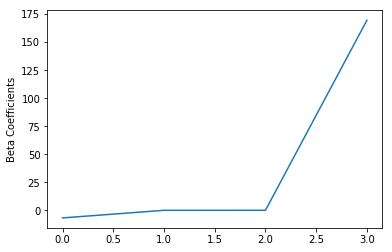

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(glr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

In [56]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator


# Train a DecisionTree model.
dt = DecisionTreeRegressor(featuresCol='features', labelCol='Total visitors')

# Train model.  This also runs the indexer.
model = dt.fit(train_data)

# Make predictions.
predictions = model.transform(test_data)

# Select example rows to display.
predictions.select( "Total visitors", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="Total visitors", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+--------------+--------------------+
|Total visitors|            features|
+--------------+--------------------+
|         67277|[2.0,1997.0,4.0,1...|
|          8381|[6.0,1997.0,4.0,3...|
|          6677|[10.0,1997.0,4.0,...|
|          5959|[11.0,1997.0,4.0,...|
|         16699|[14.0,1997.0,4.0,...|
+--------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 13280.9
